In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist
sns.set(style='white', context='notebook', palette='deep')

In [3]:
X_train = pd.read_csv("D:\level 3 2\select2\proj\csvTrainImages 60k x 784.csv")
Y_train = pd.read_csv("D:\level 3 2\select2\proj\csvTrainLabel 60k x 1.csv")
test = pd.read_csv("D:\level 3 2\select2\proj\csvTestImages 10k x 784.csv")
y_test = pd.read_csv("D:\level 3 2\select2\proj\csvTestLabel 10k x 1.csv")

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(test.shape)
print(y_test.shape)

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)


In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_train = X_train / 255.0
test = test / 255.0

In [8]:
print(X_train.shape)
print(Y_train.shape)

(59999, 784)
(59999, 1)


In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
print(X_train.shape)
print(Y_train.shape)

print(test.shape)
print(y_test.shape)

(59999, 28, 28, 1)
(59999, 1)
(9999, 28, 28, 1)
(9999, 1)


In [11]:
Y_train = to_categorical(Y_train, num_classes = 10)
y_test  = to_categorical(y_test , num_classes = 10)

In [12]:
print(Y_train.shape)
print(y_test.shape)

(59999, 10)
(9999, 10)


In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=4)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(53999, 28, 28, 1)
(53999, 10)
(6000, 28, 28, 1)
(6000, 10)


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


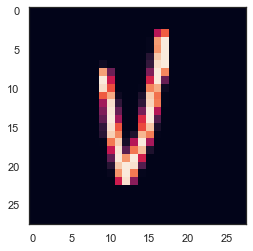

In [15]:
img_num=55                   

#image fixing

image = (X_train[img_num][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)


print(Y_train[img_num])

In [16]:

model = Sequential()

model.add(Conv2D(28, kernel_size = (4,4),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(128, activation = "relu"))


model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        476       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 128)               702592    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [17]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit( X_train,Y_train, batch_size=64, epochs = 3, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/3
844/844 [==============================] - 33s 38ms/step - loss: 0.1146 - accuracy: 0.9689 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 2/3
844/844 [==============================] - 30s 35ms/step - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.0284 - val_accuracy: 0.9907
Epoch 3/3
844/844 [==============================] - 29s 34ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0215 - val_accuracy: 0.9935


In [19]:
val_loss, val_acc=model.evaluate(test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0349 - accuracy: 0.9897


In [20]:
pred=model.predict(test)


313/313 [==============================] - 2s 6ms/step


In [24]:
print(np.argmax(pred[3]))

4


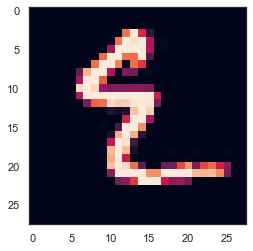

In [22]:
image=(test[3][:,:,0])
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

188/188 [==============================] - 2s 9ms/step


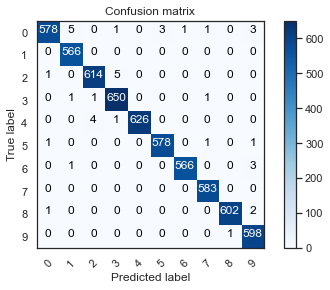

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 